# Part 1

## task 1.1

In [2]:
import torch
import numpy as np

print("PyTorch Version:", torch.__version__)

PyTorch Version: 2.8.0+cu126


In [4]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

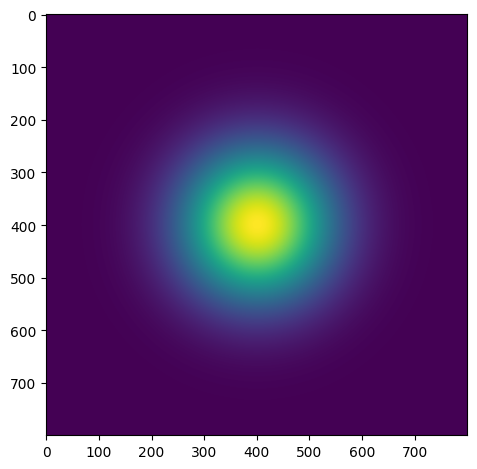

In [5]:
# grid for computing image, subdivide the space
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)

# transfer to the GPU device
x = x.to(device)
y = y.to(device)

# Compute Gaussian  (e−r2/σ, where r = x2 + y2)
z = torch.exp(-(x**2+y**2)/2.0)

#plot
import matplotlib.pyplot as plt
plt.imshow(z.cpu().numpy())#Updated!
plt.tight_layout()
plt.show()

## Task 1.2

Prompts: Generate a Python script to plot a 2D Gaussian function using Numpy and Matplotlib. Given the same result as shown with the upload image.

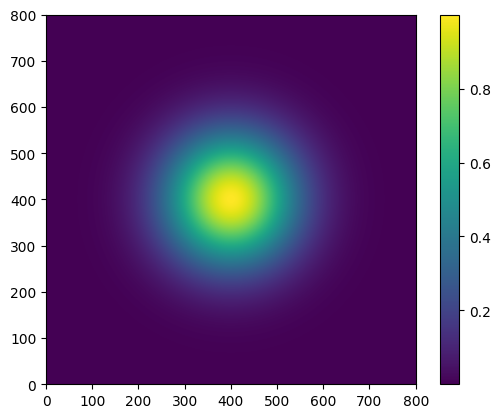

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Grid size
size = 800

# Create x and y coordinates
x = np.linspace(-4, 4, size)
y = np.linspace(-4, 4, size)
X, Y = np.meshgrid(x, y)

# Parameters for the Gaussian
mu_x, mu_y = 0, 0   # mean
sigma_x, sigma_y = 1, 1  # standard deviations

# 2D Gaussian function
Z = np.exp(-(((X - mu_x) ** 2) / (2 * sigma_x ** 2) + ((Y - mu_y) ** 2) / (2 * sigma_y ** 2)))

# Plot
plt.imshow(Z, extent=(0, size, 0, size), origin='lower', cmap='viridis')
plt.colorbar()
plt.show()


Prompt: convert this script to PyTorch and to use its Tensors instead of Numpy

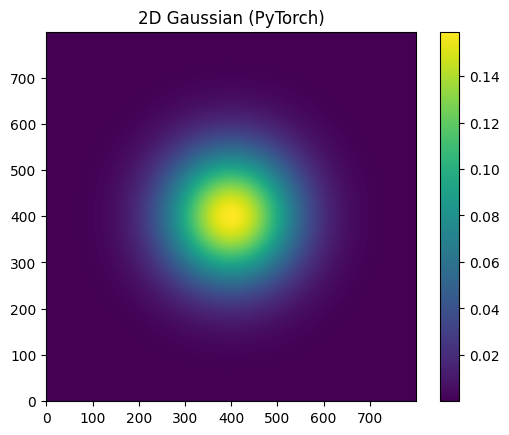

In [12]:
import torch
import matplotlib.pyplot as plt

# Use GPU if available (optional)
device = "cuda" if torch.cuda.is_available() else "cpu"

# Grid size and coordinates
size = 800
x = torch.linspace(-4, 4, size, device=device)
y = torch.linspace(-4, 4, size, device=device)
Y, X = torch.meshgrid(y, x, indexing="ij")  # 'ij' keeps rows as y and cols as x

# Gaussian parameters
mu_x, mu_y = 0.0, 0.0
sigma_x, sigma_y = 1.0, 1.0

# 2D Gaussian (all in torch)
Z = torch.exp(
    -(((X - mu_x) ** 2) / (2 * sigma_x ** 2) + ((Y - mu_y) ** 2) / (2 * sigma_y ** 2))
)

# If you want a normalized PDF, uncomment the next line:
Z = Z / (2 * torch.pi * sigma_x * sigma_y)

# Plot (convert to NumPy only for imshow)
plt.imshow(Z.detach().cpu().numpy(), origin="lower", cmap="viridis")
plt.colorbar()
plt.title("2D Gaussian (PyTorch)")
plt.show()


## task 1.3

change the Gaussian function into a 2D sine or cosine function

A 2D sine function, often called a plane wave, is a mathematical function that represents a wave oscillating in two dimensions.
It's defined by an equation like **z(x, y, t) = A * sin(k₁x + k₂y - ωt + φ)**, where:
z(x, y, t) represents the height of the wave at a specific point (x, y) and time t.
* A is the amplitude, determining the wave's height.
* k₁ and k₂ are wave numbers along the x and y axes, respectively, affecting the wave's frequency and direction.
* ω is the angular frequency, related to the wave's temporal behavior.
* φ is the phase shift, which can be adjusted to shift the wave horizontally.

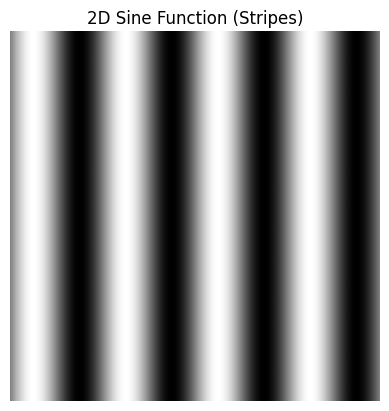

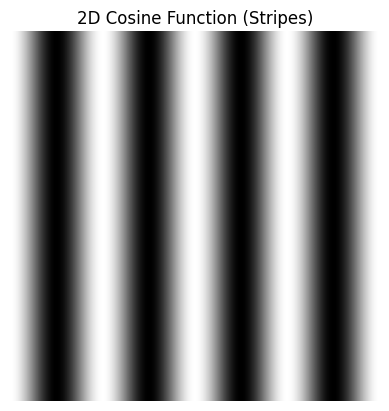

In [74]:
import torch
import matplotlib.pyplot as plt

# Device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Grid
size = 500
x = torch.linspace(0.0, 2 * torch.pi, size, device=device)
y = torch.linspace(0.0, 2 * torch.pi, size, device=device)
Y, X = torch.meshgrid(y, x, indexing="ij")  # NOTE: meshgrid, not neshgrid
theta_t = torch.tensor(0.0, device=device) * torch.pi / 180

A = 3
freq = 4
angular_frequency = (2 * torch.pi) / freq
phase = 0.0
# z(x, y, t) = A * sin(k₁x + k₂y - ωt + φ)
kx = freq * torch.cos(theta_t)
ky = freq * torch.sin(theta_t)
S = A * torch.sin(X * kx + Y * ky - angular_frequency * theta_t + phase)

# Plot
plt.imshow(S, origin="lower", cmap="gray")
plt.title("2D Sine Function (Stripes)")
plt.axis("off")
plt.show()

C = A * torch.cos(X * kx + Y * ky - angular_frequency * theta_t + phase)

# Plot
plt.imshow(C, origin="lower", cmap="gray")
plt.title("2D Cosine Function (Stripes)")
plt.axis("off")
plt.show()


What do you get when you multiply both the Gaussian and the sine/cosine function together and
visualise it?

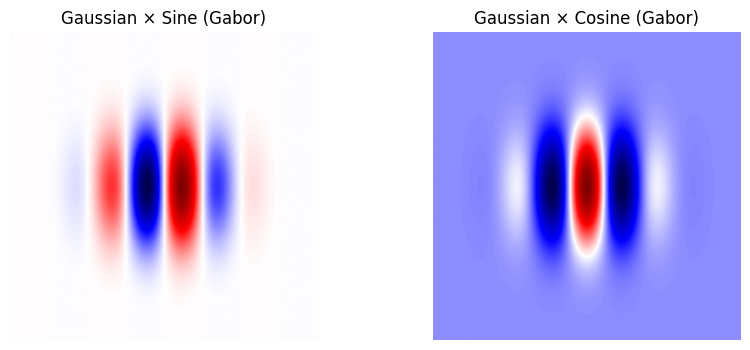

In [75]:
import torch
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"

# Grid size
size = 500
x = torch.linspace(-4, 4, size, device=device)
y = torch.linspace(-4, 4, size, device=device)
Y, X = torch.meshgrid(y, x, indexing="ij")

# --- Gaussian ---
# Gaussian parameters
mu_x, mu_y = 0.0, 0.0
sigma_x, sigma_y = 1.0, 1.0

# 2D Gaussian (all in torch)
G = torch.exp(
    -(((X - mu_x) ** 2) / (2 * sigma_x ** 2) + ((Y - mu_y) ** 2) / (2 * sigma_y ** 2))
)

# --- Sine / Cosine pattern ---
size = 500
x = torch.linspace(0.0, 2 * torch.pi, size, device=device)
y = torch.linspace(0.0, 2 * torch.pi, size, device=device)
Y, X = torch.meshgrid(y, x, indexing="ij")  # NOTE: meshgrid, not neshgrid
theta_t = torch.tensor(0.0, device=device) * torch.pi / 180

A = 3
freq = 4
angular_frequency = (2 * torch.pi) / freq
phase = 0.0
# z(x, y, t) = A * sin(k₁x + k₂y - ωt + φ)
kx = freq * torch.cos(theta_t)
ky = freq * torch.sin(theta_t)
S = A * torch.sin(X * kx + Y * ky - angular_frequency * theta_t + phase)

C = A * torch.cos(X * kx + Y * ky - angular_frequency * theta_t + phase)

# --- Multiply: Gaussian envelope × Sine/Cosine ---
GS = G * S
GC = G * C

# --- Plot ---
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(GS.detach().cpu().numpy(), origin="lower", cmap="seismic")
plt.title("Gaussian × Sine (Gabor)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(GC.detach().cpu().numpy(), origin="lower", cmap="seismic")
plt.title("Gaussian × Cosine (Gabor)")
plt.axis("off")

plt.show()

# Part 2

In this part, we will be using PyTorch to compute the Mandelbrot set, a fractal that is present in the
complex plane. The essence of the Mandelbrot set is to compute which points in the complex plane
converge when repeatedly squared or diverge (tend to infinity). In other words, we are going to com-
pute the equation **zn+1 = z^2_n + c iteratively for the point c with z0 = 0. For example for the point c, at
the first iteration we have z1 = 0 + c then z2 = z1 + c and so on. To construct the fractal, we will colour
the points that converge to black and the remaining points coloured based on the rate of divergence.

Consider the point c = 0.5 + 0.5j in the complex plane. Its magnitude | c | is less than unity and
repeatedly squaring this number makes the result smaller and smaller. In fact, it tends to zero and so
we conclude that this point converges and colour it black. Other points whose magnitude is greater
than may in fact diverge, so we may colour these using colours that denote the rate at which they are
diverging.

## Task 2.1

/tmp/ipython-input-2790085586.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


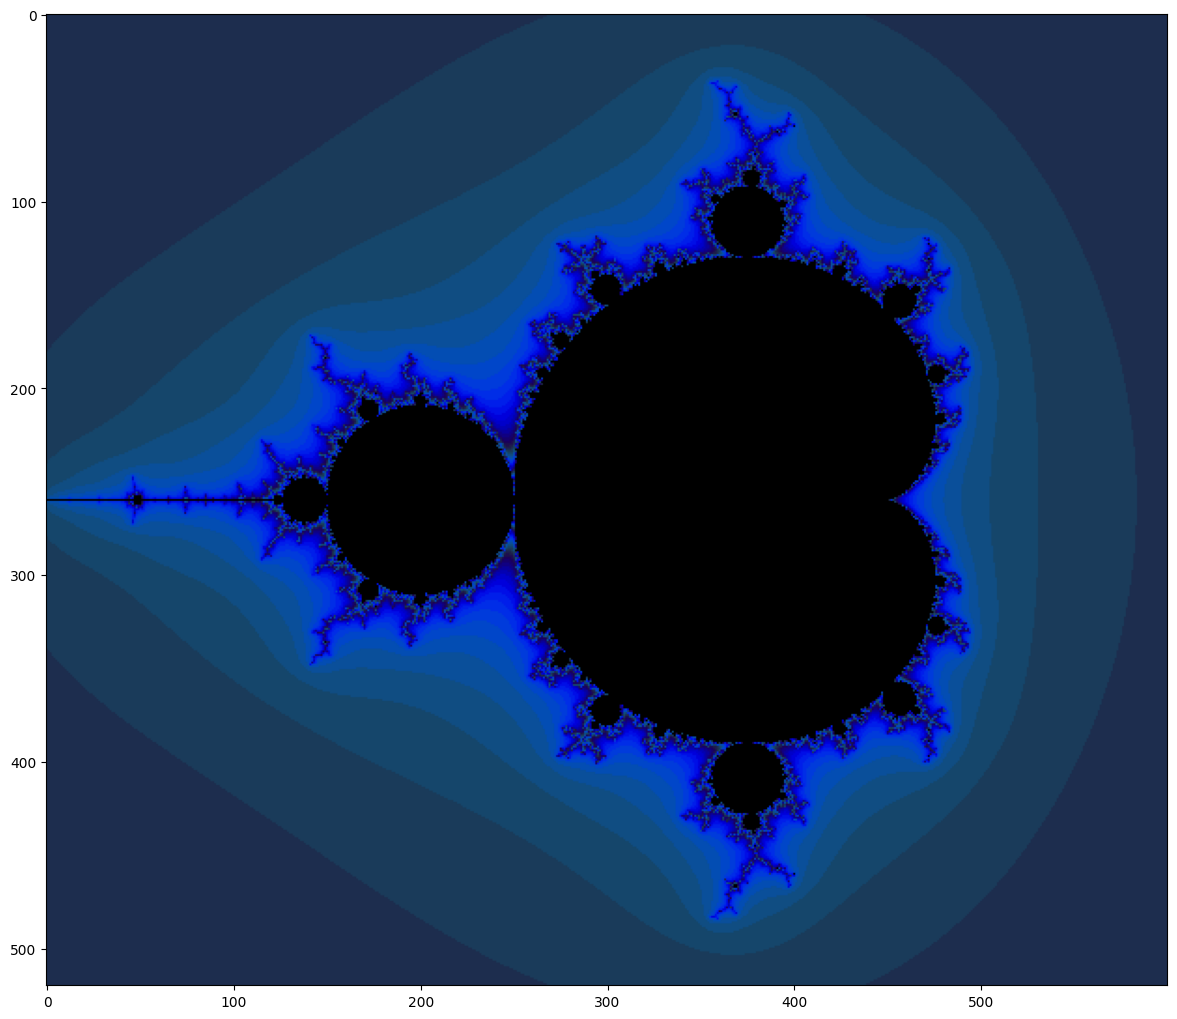

In [97]:
import torch
import numpy as np
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
zs = z.clone() #Updated!
ns = torch.zeros_like(z)

# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

#Mandelbrot Set
for i in range(300):
    #Compute the new values of z: z^2 + x
    zs_ = zs*zs + z
    #Have we diverged with this new value?
    not_diverged = torch.abs(zs_) < 4.0
    #Update variables to compute
    ns += not_diverged
    zs = zs_

#plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
def processFractal(a):
    """
    Display an array of iteration counts as a
    colorful picture of a fractal.
    """
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
    30+50*np.sin(a_cyclic),
    155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a
plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()

## Task 2.2

Prompt: Generate a Python script to compute the Mandelbrot set, a fractal that is present in the
complex plane, by using PyTorch and to use its Tensors. A expected graph is given.

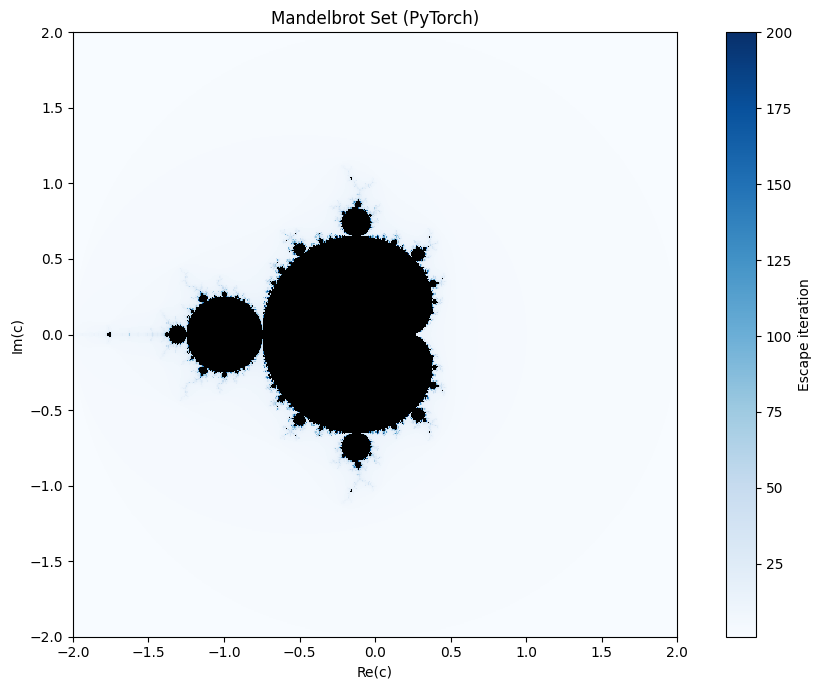

In [81]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# ----- Device -----
device = "cuda" if torch.cuda.is_available() else "cpu"

# ----- Image / region parameters -----
H, W = 500, 600                  # image height, width
x_min, x_max = -2, 2         # real-axis range
y_min, y_max = -2, 2       # imaginary-axis range

max_iter = 200                   # iterations (increase for more detail)

# ----- Build complex grid in PyTorch -----
xs = torch.linspace(x_min, x_max, W, device=device)
ys = torch.linspace(y_min, y_max, H, device=device)
Y, X = torch.meshgrid(ys, xs, indexing="ij")      # H x W

c_re, c_im = X, Y
z_re = torch.zeros_like(c_re)
z_im = torch.zeros_like(c_im)

escaped = torch.zeros((H, W), dtype=torch.int32, device=device)
active  = torch.ones((H, W), dtype=torch.bool, device=device)

for i in range(1, max_iter + 1):
    # z_{n+1} = z^2 + c, with real/imag parts
    zr2 = z_re * z_re
    zi2 = z_im * z_im
    two_zrzi = 2.0 * z_re * z_im

    next_re = zr2 - zi2 + c_re
    next_im = two_zrzi + c_im

    # magnitude^2 and newly escaped mask
    mag2 = next_re * next_re + next_im * next_im
    new_escaped = active & (mag2 > 4.0)

    # record first escape iteration
    escaped = torch.where(
    new_escaped,
    torch.full_like(escaped, i),  # fill with scalar i, same shape/dtype/device as escaped
    escaped
)

    # keep updating only active points but without fancy indexing
    z_re = torch.where(active, next_re, z_re)
    z_im = torch.where(active, next_im, z_im)

    # deactivate newly escaped
    active = active & ~new_escaped

    # (Optional) don’t early-break: fixed shapes can be faster on GPU
    # if not active.any(): break

# Points that never escaped (the Mandelbrot set) keep escape==0

# ----- Prepare for plotting -----
# Use NaN for the interior so we can color it black cleanly
to_plot = escaped.float()
to_plot[to_plot == 0] = float("nan")

cmap = plt.cm.Blues.copy()
cmap.set_bad("black")     # NaN (the set) -> black

plt.figure(figsize=(10, 7))
plt.imshow(
    to_plot.detach().cpu().numpy(),
    cmap=cmap,
    origin="lower",
    extent=[x_min, x_max, y_min, y_max],
    interpolation="nearest",
)
plt.xlabel("Re(c)")
plt.ylabel("Im(c)")
plt.title("Mandelbrot Set (PyTorch)")
plt.colorbar(label="Escape iteration")
plt.tight_layout()
plt.show()


How good is the AI model in generating the Mandelbrot set implemented in PyTorch and that runs
on the GPU (i.e. seems to run fast and allows fast rendering) via prompts? Were there any issues
encountered and did you need to modify the code, and if so, what were they?

Correct escape-time algorithm and correct output. However the way AI try to calculate is a bit complex or not easy to understand.

## Task 2.3

/tmp/ipython-input-684135161.py:49: ComplexWarning: Casting complex values to real discards the imaginary part
  img = np.uint8(np.clip(img, 0, 255))


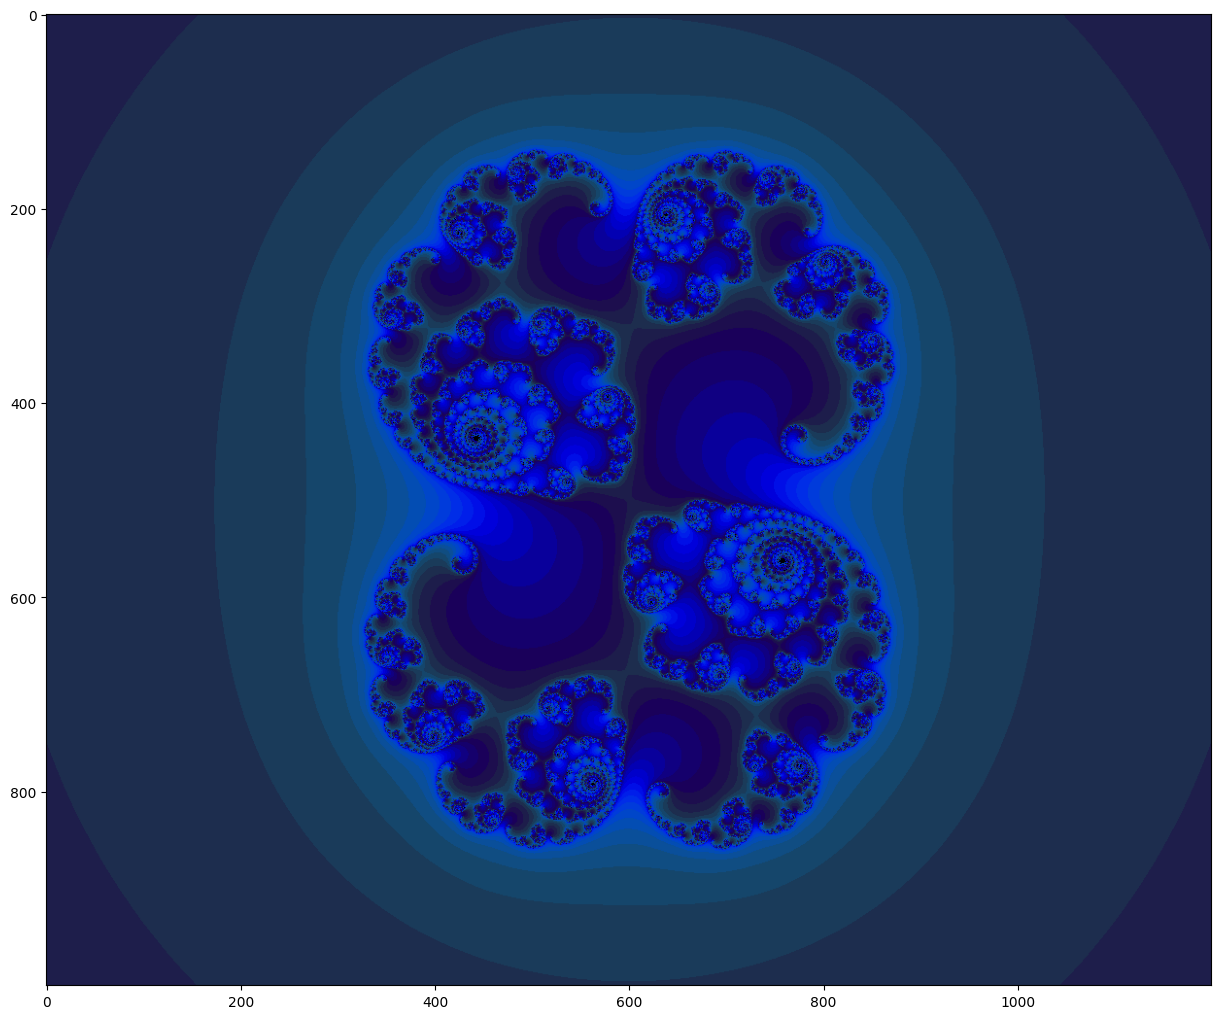

In [100]:
import torch
import numpy as np
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Y, X = np.mgrid[-1.5:1.5:0.003, -1.8:1.8:0.003]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
zs = z.clone() #Updated!
ns = torch.zeros_like(z)

# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

# c = -0.8 + 0.156j
# c = 0.285 + 0.01j
# c = -0.4 + 0.6j
c = torch.complex(torch.tensor(0.285, device=device), torch.tensor(0.01, device=device))

#Mandelbrot Set
for i in range(200):
    #Compute the new values of z: z^2 + c
    zs_ = zs*zs + c
    #Have we diverged with this new value?
    not_diverged = torch.abs(zs_) < 4.0
    #Update variables to compute
    ns += not_diverged
    zs = zs_

#plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
def processFractal(a):
    """
    Map iteration counts to colors.
    """
    a_cyclic = (6.28 * a / 20.0).reshape(list(a.shape) + [1])
    img = np.concatenate([
        10 + 20 * np.cos(a_cyclic),
        30 + 50 * np.sin(a_cyclic),
        155 - 80 * np.cos(a_cyclic)
    ], axis=2)
    img[a == a.max()] = 0
    img = np.uint8(np.clip(img, 0, 255))
    return img
plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()